In [17]:
import pandas as pd
import numpy as np
import fugashi
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
from ipywidgets import Dropdown

language = r'Inglese'

options = [
    r'Inglese',
    r'Giapponese',
]

dropdown = Dropdown(options=options, description='Seleziona la lingua:', disabled = False)

def dropdown_handler(change):

    global language
    print(change.new)
    language = change.new  

dropdown.observe(dropdown_handler, names='value')
display(dropdown)

Dropdown(description='Seleziona la lingua:', options=('Inglese', 'Giapponese'), value='Inglese')

In [19]:
input('Premi start per continuare')

''

In [20]:
if language=='Inglese':
    df = pd.read_csv('english_news.csv', delimiter='\t', header=0) # lettura del file csv
else:
    df = pd.read_csv('japanese_news.csv', delimiter='\t', header=0) # lettura del file csv             
                                            
df # visualizzazione del file csv

Giapponese


C:\Users\giaco\AppData\Local\Temp\ipykernel_1424\3216993768.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('japanese_news.csv', delimiter='\t', header=0) # lettura del file csv


,source,date,title,author,text
0,kobe-np.co.jp,2005-07-01,NaN,NaN,会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体とし...
1,kobe-np.co.jp,2005-07-01,NaN,NaN,明石・歩道橋事故をめぐる民事訴訟で、神戸地裁から計五億六千八百万円の賠償を命じられた兵庫県（...
2,kobe-np.co.jp,2007-04-07,NaN,NaN,会見後、遺族代理人の渡部吉泰弁護士は「裁判長が『問うべき者を問わないのは正義に反する』とはっ...
3,kobe-np.co.jp,2007-04-07,NaN,NaN,遺族会は、雑踏警備本部長を務めた元明石署長ら二人の起訴を求め、活動を続けている。
4,kobe-np.co.jp,2007-04-07,NaN,NaN,五人の遺族が閉廷後に会見。二女の優衣菜ちゃん＝当時（８つ）＝を亡くした三木清さん（３８）＝姫...
...,...,...,...,...,...
312950,mainichi.jp,2021-09-29,「ゴルゴ13」漫画家のさいとう・たかをさん死去 84歳 連載は継続,NaN,「ゴルゴ13」や「無用ノ介」などで知られる漫画家のさいとう・たかを（本名・斉藤隆夫＝さいとう...
312951,mainichi.jp,2021-10-07,作曲家のすぎやまこういちさん死去 90歳 ドラゴンクエストなど,NaN,NaN
312952,mainichi.jp,2021-10-18,直木賞作家、山本文緒さん死去 58歳 「プラナリア」「恋愛中毒」,NaN,現代女性の恋愛や生きづらさを描いて人気を集めた直木賞作家の山本文緒（やまもと・ふみお、本名・...
312953,mainichi.jp,2021-10-26,漫画家の白土三平さん死去 89歳 「カムイ伝」「忍者武芸帳」,NaN,「カムイ伝」などで知られる漫画家の白土三平（しらと・さんぺい、本名・岡本登＝おかもと・のぼる...


In [21]:
print(df.info()) # analizziamo il numero di null sulle colonne di nostro interesse (source e text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312955 entries, 0 to 312954
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  312955 non-null  object
 1   date    312955 non-null  object
 2   title   39 non-null      object
 3   author  1 non-null       object
 4   text    312954 non-null  object
dtypes: object(5)
memory usage: 11.9+ MB
None


In [23]:
df = df.dropna(subset=['text']) # eliminiamo le righe con valore Null in occasione della feature text

print(df.info())
print(df.describe())

if language == 'Inglese':
    vectorizer = CountVectorizer()
    # Sistemiamo i testi mettendoli tutti in minuscolo e rimuovendo i caratteri speciali e di punteggiatura
    df['text'] = df['text'].apply(lambda x: x.lower()) 

    for char in [':', '.', ';', ',', '+', '-', '(', ')', '[', ']', '!', '?', '@', '$', '&', '#', '|', '^', '_', '-']:
        df['text'] = df['text'].apply(lambda x: x.replace(':', ''))

else:
    tagger = fugashi.Tagger()
    def tokenize_japanese_text(text):
        return ' '.join(elemento.surface for elemento in tagger(text))

    vectorizer = CountVectorizer(tokenizer=tokenize_japanese_text)
    df['text'] = df['text'].apply(tokenize_japanese_text)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312954 entries, 0 to 312954
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  312954 non-null  object
 1   date    312954 non-null  object
 2   title   38 non-null      object
 3   author  1 non-null       object
 4   text    312954 non-null  object
dtypes: object(5)
memory usage: 14.3+ MB
None
             source        date                  title author  \
count        312954      312954                     38      1   
unique           21        1261                     38      1   
top     mainichi.jp  2011-10-28  首相の所信表明演説　岸田カラーなぜ出せない    By    
freq          44656        7974                      1      1   

                                                     text  
count                                              312954  
unique                                             312954  
top     会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体とし...  
freq               

C:\Users\giaco\AppData\Local\Temp\ipykernel_1424\1226328786.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(tokenize_japanese_text)


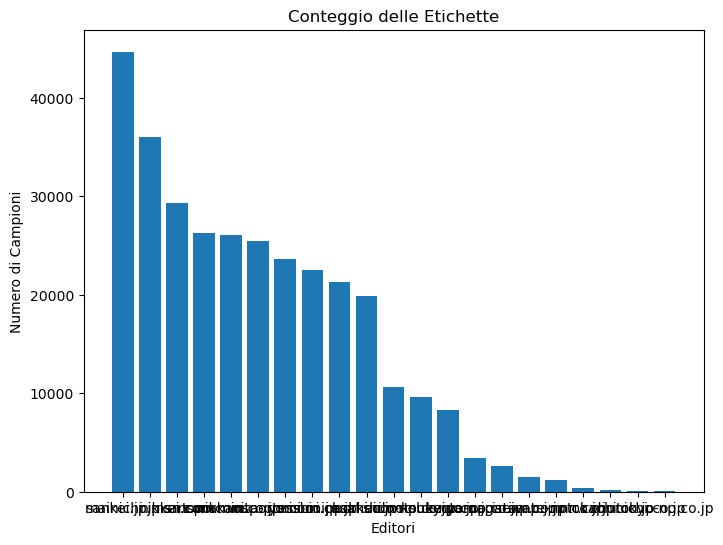

mainichi.jp          44656
sankei.jp.msn.com    35959
nikkei.com           29323
sanspo.com           26303
tomamin.co.jp        26054
nikkansports.com     25483
oita-press.co.jp     23645
yomiuri.co.jp        22472
nishinippon.co.jp    21311
asahi.com            19855
hokkaido-np.co.jp    10653
shimotsuke.co.jp      9581
kobe-np.co.jp         8311
kyoto-np.co.jp        3408
yamagata-np.jp        2585
isenp.co.jp           1496
iwate-np.co.jp        1198
nnn.co.jp              347
tokachi.co.jp          176
chunichi.co.jp          73
tokyo-np.co.jp          65
Name: source, dtype: int64


In [24]:
# Visualizziamo graficamente le osservazioni per ogni label presente nel dataset (source)

import matplotlib.pyplot as plt

label_counts = df['source'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Editori')
plt.ylabel('Numero di Campioni')
plt.title('Conteggio delle Etichette')
plt.show()

print(label_counts)
# Il dataset è altamente sbilanciato

In [25]:
labels = np.unique(df['source'])

minority_class = df['source'].value_counts().min()

concatenated_training = []          
sampling_idx = np.array([])
for label in labels:
    sampling = df[df['source'] == label].sample(n=minority_class)
    concatenated_training.append(sampling)
    sampling_idx = np.append(sampling_idx, sampling.index)

df_validation = df.drop(sampling_idx.reshape(-1,))
df_final = pd.concat(concatenated_training, ignore_index=True)

In [26]:
df_final.describe()

,source,date,title,author,text
count,1365,1365,0,0,1365
unique,21,392,0,0,1365
top,asahi.com,2011-10-28,NaN,NaN,安住 氏 は 答弁 で 「 特別 会計 は （ 使い道 が ） 硬直 化 し 議会 の チェ...
freq,65,52,NaN,NaN,1


### SVM classifier

Accuracy: 0.98755


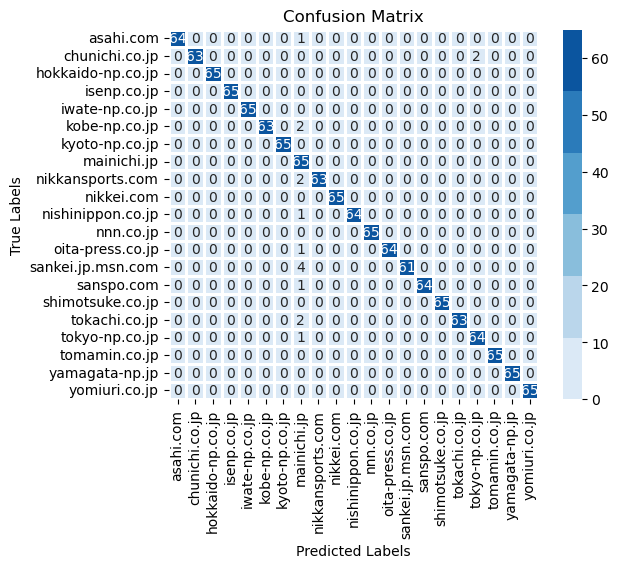

In [35]:
# pre processiamo i testi convertendoli in vettori numerici
X = vectorizer.fit_transform(df_final['text'])

X_train = X
y_train = df_final['source']

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid-Search
svm_model = SVC()
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best_params = svm_grid.best_params_
svm_best_model = svm_grid.best_estimator_

# Training
svm_classifier = svm_best_model
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.19357


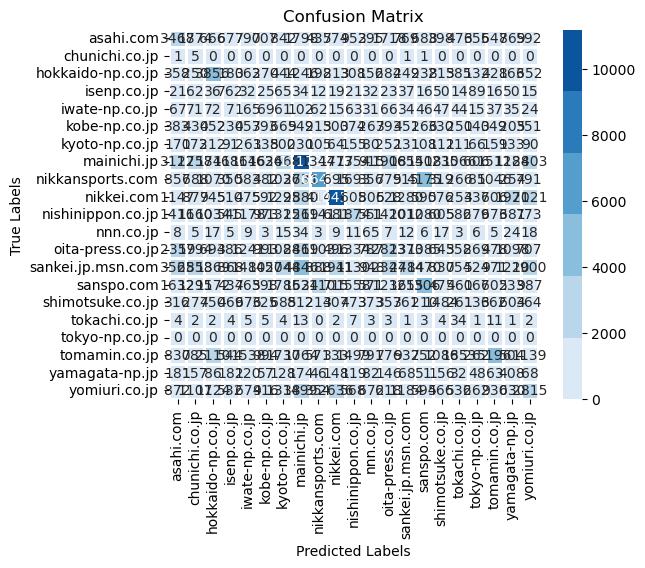

In [36]:
X_validation = df_validation['text']
Y_validation = df_validation['source']

X_validation = vectorizer.transform(X_validation)

# Predicting
y_pred_validation = svm_classifier.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# NOTE: effettuare l'undersampling ha portato a un migliroamento della precisione sul Manichi Shimbun,\
#  con annessa riduzione di tempo computazionale

# NOTE 2: se ci fossero stati più dati si sarebbe anche potuta fare K-folds; i risultati sono già soddisfacenti così

# NOTE 3: il vectorizer una volta fittato, lo uso solo per trasformare il testo (solo funzione transform)

# NOTE 4: provare option della class weight di sklearn per svm nel caso di classi non bilanciate

# NOTE 5: kernel Poly scartato per bassa validation accuracy, RBF performa peggio del linear sugli validation, anche il sigmoid

### Decision tree

Accuracy: 0.59414


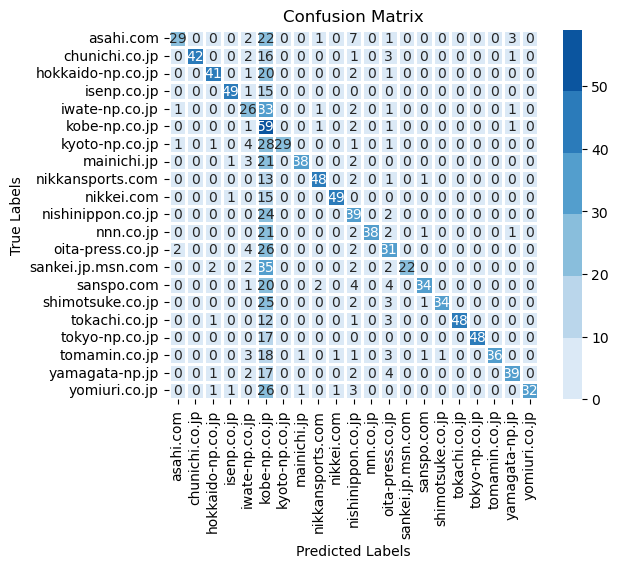

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

# Grid-Search
tree_model = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best_params = tree_grid.best_params_
tree_best_model = tree_grid.best_estimator_

# Training
decision_tree = tree_best_model
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.13618


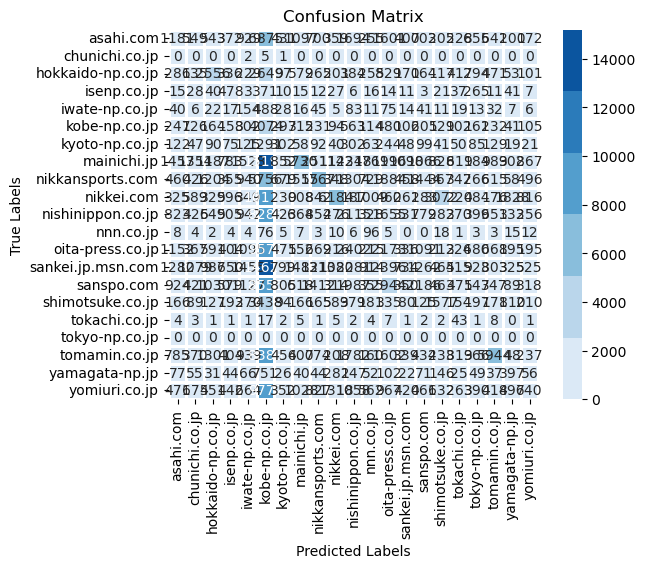

In [39]:
# Prediciting
y_pred_validation = decision_tree.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# NOTE 1: aumento delle performance sugli validation anche se di poco

### Random forest

Accuracy: 0.98974


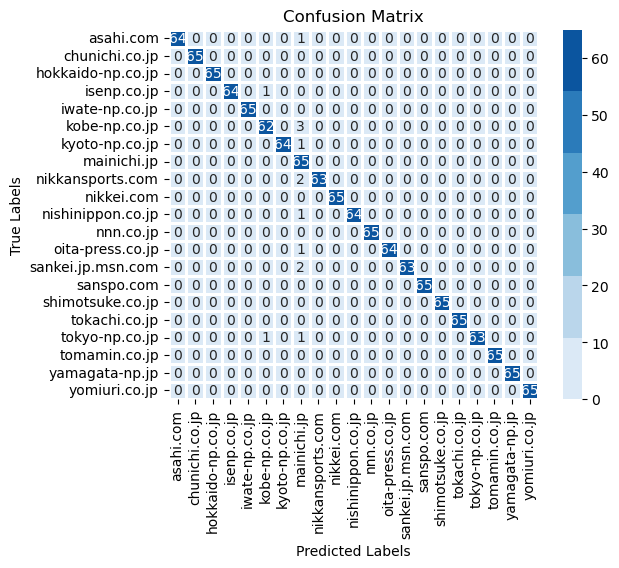

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

# Grid-Search
forest_model = RandomForestClassifier()
forest_grid = GridSearchCV(forest_model, forest_params, cv=5)
forest_grid.fit(X_train, y_train)
forest_best_params = forest_grid.best_params_
forest_best_model = forest_grid.best_estimator_

# Training
random_forest = forest_best_model
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")


cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.23300


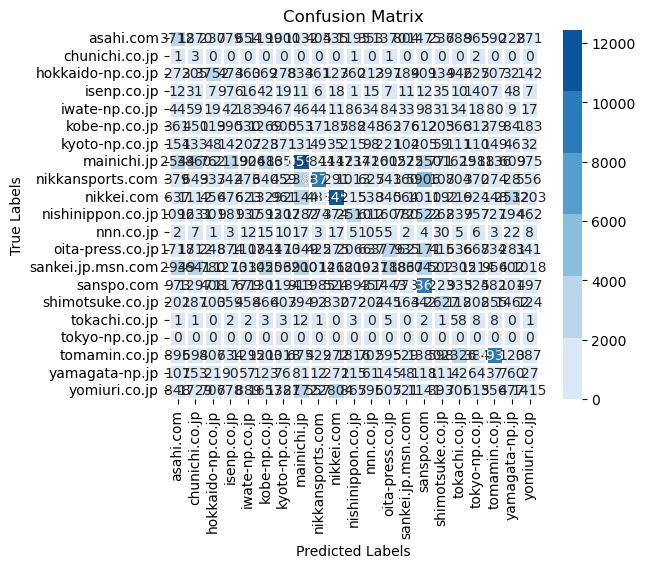

In [42]:
# Predicting
y_pred_validation = random_forest.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()